In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Online Retail.csv')
df = dataset.copy() #Creating the copy of the dataframe 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [7]:
np.sum(df.isnull())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(536641, 8)

In [18]:
df['CustomerID'].nunique()

25900

In [19]:
df['InvoiceNo'].nunique()

25900

In [33]:
np.sum(df.isnull())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [25]:
round(df['CustomerID'].isnull().sum() * 100 / len(df),2)

25.16

In [45]:
#df.groupby('column1').max()

df.groupby('InvoiceNo')['CustomerID'].nunique().tail(5) #.reset_index(name='nunique').sort_values(['nunique']).tail(5)

InvoiceNo
C581484    1
C581490    1
C581499    1
C581568    1
C581569    1
Name: CustomerID, dtype: int64

In [134]:
uk_df = df[df.Country == 'United Kingdom']
uk_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [46]:
df["TotalSum"] = df["Quantity"] * df["UnitPrice"]
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [51]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].dt.strftime('%Y-%m-%d'))

In [52]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [138]:
uk_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom,214.80


In [139]:
minInvoiceData = min(uk_df["InvoiceDate"])
maxInvoiceData = max(uk_df["InvoiceDate"])
snapshot = uk_df["InvoiceDate"].max()

In [140]:
customer_group = uk_df.groupby("CustomerID")
customer_group.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
538814,581416,23458,DOLLY CABINET 3 DRAWERS,1,2011-12-08,14.95,14569.0,United Kingdom,14.95
538815,581416,22801,ANTIQUE GLASS PEDESTAL BOWL,16,2011-12-08,3.39,14569.0,United Kingdom,54.24
538816,581416,22798,ANTIQUE GLASS DRESSING TABLE POT,48,2011-12-08,2.55,14569.0,United Kingdom,122.40
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,168469.60


In [141]:
customer_group.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
538814,581416,23458,DOLLY CABINET 3 DRAWERS,1,2011-12-08,14.95,14569.0,United Kingdom,14.95
538815,581416,22801,ANTIQUE GLASS PEDESTAL BOWL,16,2011-12-08,3.39,14569.0,United Kingdom,54.24
538816,581416,22798,ANTIQUE GLASS DRESSING TABLE POT,48,2011-12-08,2.55,14569.0,United Kingdom,122.40
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,168469.60


In [142]:
recency = (snapshot - customer_group["InvoiceDate"].max())
recency.head()

CustomerID
12346.0   325 days
12747.0     2 days
12748.0     0 days
12749.0     3 days
12820.0     3 days
Name: InvoiceDate, dtype: timedelta64[ns]

In [143]:
frequency = customer_group["InvoiceNo"].nunique()
frequency.head()

CustomerID
12346.0      2
12747.0     11
12748.0    224
12749.0      8
12820.0      4
Name: InvoiceNo, dtype: int64

In [144]:
monetary = customer_group["TotalSum"].sum()
monetary.head()

CustomerID
12346.0        0.00
12747.0     4196.01
12748.0    28405.56
12749.0     3868.20
12820.0      942.34
Name: TotalSum, dtype: float64

In [145]:
tenure = (snapshot - customer_group["InvoiceDate"].min())
tenure.head()

CustomerID
12346.0   325 days
12747.0   369 days
12748.0   373 days
12749.0   213 days
12820.0   326 days
Name: InvoiceDate, dtype: timedelta64[ns]

In [146]:
rfm = pd.DataFrame()
rfm["recency"] = recency.dt.days
rfm["frequency"] = frequency
rfm["Monetary"] = monetary
rfm["Tenure"] = tenure.dt.days
rfm.head()

,recency,frequency,Monetary,Tenure
CustomerID,,,,
12346.0,325,2,0.00,325
12747.0,2,11,4196.01,369
12748.0,0,224,28405.56,373
12749.0,3,8,3868.20,213
12820.0,3,4,942.34,326


In [106]:
pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 301 kB 25.9 MB/s            
     |████████████████████████████████| 81 kB 10.4 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 25.9 MB 54.3 MB/s            
     |████████████████████████████████| 1.5 MB 59.1 MB/s            
     |████████████████████████████████| 24.2 MB 31.4 MB/s            
     |████████████████████████████████| 1.3 MB 57.4 MB/s            
     |████████████████████████████████| 10.4 MB 57.4 MB/s            
     |████████████████████████████████| 26.5 MB 55.9 MB/s            
     |████████████████████████████████| 56 kB 10.8 MB/s            
     |████████████████████████████████| 636 kB 57.0 MB/s            
     |████████████████████████████████| 271 kB 55.9 MB/s            
     |████████████████████████████████| 1.7 MB 54.3 MB/s            
  Installing build dependencies ... done
  Getting 

In [115]:
from pycaret.clustering import *

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

<AxesSubplot:xlabel='recency', ylabel='Density'>

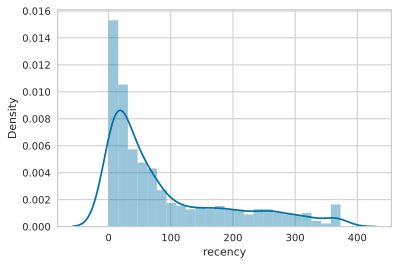

In [147]:
sns.distplot(rfm['recency'])

<AxesSubplot:xlabel='frequency', ylabel='Density'>

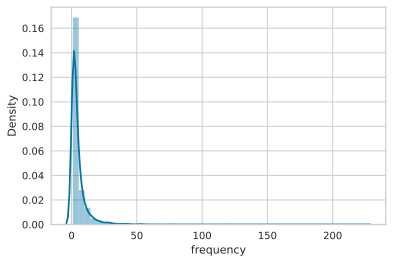

In [148]:
sns.distplot(rfm['frequency'])

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

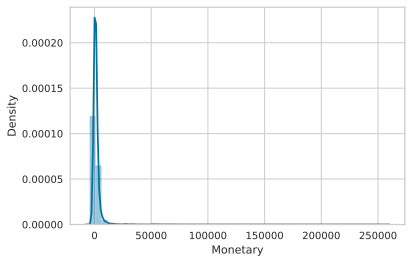

In [149]:
sns.distplot(rfm['Monetary'])

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

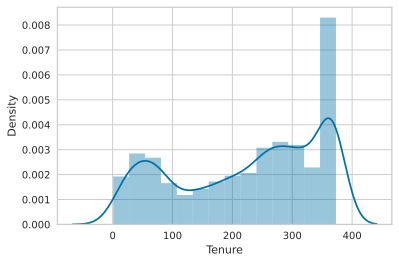

In [150]:
sns.distplot(rfm['Tenure'])

In [151]:
cluster = setup(rfm, session_id = 12)

,Description,Value
0,session_id,12
1,Original Data,"(3950, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(3950, 4)"
9,CPU Jobs,-1


In [152]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8417,13277.1813,0.421,0,0,0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


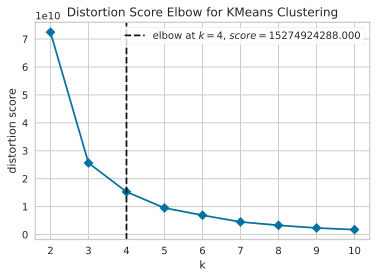

In [153]:
plot_model(model, 'elbow')

In [154]:
model = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8417,13277.1813,0.421,0,0,0


In [155]:
plot_model(model, 'cluster')

In [156]:
results = assign_model(model)
results.head(10)

,recency,frequency,Monetary,Tenure,Cluster
CustomerID,,,,,
12346.0,325,2,0.00,325,Cluster 0
12747.0,2,11,4196.01,369,Cluster 0
12748.0,0,224,28405.56,373,Cluster 3
12749.0,3,8,3868.20,213,Cluster 0
12820.0,3,4,942.34,326,Cluster 0
12821.0,214,1,92.72,214,Cluster 0
12822.0,70,3,918.98,87,Cluster 0
12823.0,74,5,1759.50,296,Cluster 0
12824.0,59,1,397.12,59,Cluster 0


In [158]:
results.describe()

,recency,frequency,Monetary,Tenure
count,3950.000000,3950.000000,3950.000000,3950.000000
mean,91.323038,5.027089,1708.140798,225.464810
std,100.236848,8.717306,6548.935742,118.568939
min,0.000000,1.000000,-4287.630000,1.000000
25%,16.000000,1.000000,281.030000,115.000000
50%,50.000000,3.000000,623.335000,253.000000
75%,143.000000,5.000000,1517.797500,331.750000
max,373.000000,224.000000,256438.490000,373.000000


In [162]:
data_melt = pd.melt(results.reset_index(),
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['recency', 'frequency','Monetary'],
                    var_name='Attribute',
                    value_name='Value')

<AxesSubplot:xlabel='Attribute', ylabel='Value'>

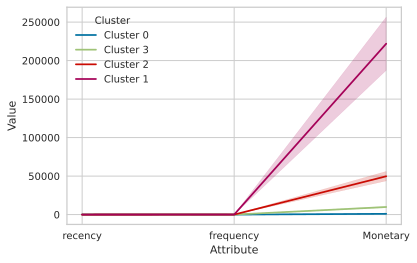

In [164]:
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=data_melt)